In [1]:
import matplotlib.pyplot as plt
plt.style.use(['classic'])
import astropy.coordinates as coord
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from astropy.io import fits
from scipy import stats
from scipy.stats import binned_statistic
from scipy.linalg import block_diag,eigh
plt.rcParams['font.family']='stixgeneral'
plt.rcParams.update({'font.size':16})
from astropy.io import fits
from mpl_toolkits.mplot3d import Axes3D
from astropy.coordinates import (CartesianRepresentation,CartesianDifferential)
from astropy.coordinates import Galactic
from astropy import units as u1
from astropy.coordinates import SkyCoord
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.stats import chisquare
from itertools import groupby
import scipy.integrate as integrate
import scipy.special as special
from scipy.stats import poisson
from scipy.optimize import minimize

In [2]:
rvs  = fits.open('/global/cfs/cdirs/desi/science/mws/redux/blanc/rv_output/210112/rvtab_coadd-blanc-nights.fits')






In [4]:
rvs[2].header


In [5]:
df=pd.DataFrame()
df['TARGETID']=rvs[1].data['TARGETID']
df['SN_Z']=rvs[1].data['SN_Z']
df['VRAD']=rvs[1].data['VRAD']
df['VRAD_ERR']=rvs[1].data['VRAD_ERR']
#df['NIGHT']=rvs[1].data['NIGHT']

In [6]:
len(df['TARGETID'])

161069

In [7]:
len(np.unique(df['TARGETID']))

69130

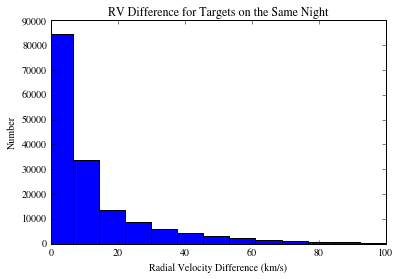

In [8]:
plt.hist(df['SN_Z'],bins=50)
plt.xlabel('Radial Velocity Difference (km/s)')
plt.ylabel('Number')
plt.xlim(0,100)
plt.title('RV Difference for Targets on the Same Night')
plt.show()

In [21]:
np.mean(df['SN_Z'])

13.755933242188188

In [7]:
df

,TARGETID,SN_Z,VRAD,VRAD_ERR
0,35191277586743837,6.798590,-297.667049,34.566827
1,35191277586746140,2.477455,11.294046,403.611180
2,35191277590939422,47.936947,-83.984652,0.806305
3,35191277590940282,2.239573,179.569448,310.750326
4,35191281164486149,2.392362,-28.887432,15.139918
...,...,...,...,...
161064,35191270364153632,2.328611,1421.084672,749.805302
161065,576511620058972478,1.197274,-15.872929,11.224048
161066,576511620058972709,1.346746,11.707829,18.689432
161067,611652011682693827,0.983784,-18.920249,28.124178


In [9]:
def rvs_scatter(rvsfile,n):
    vdifftot = []
    errtotf = []
    sntot = []
    colortot = []
    num = []
    
    uid,rv,rve,rsn = np.unique(rvsfile[1].data['TARGETID']),rvsfile[1].data['VRAD'],rvsfile[1].data['VRAD_ERR'],rvsfile[1].data['SN_Z']
   
    color = (22.5 - 2.5*np.log10(rvsfile[2].data['FIBERFLUX_G']))-(22.5- 2.5*np.log10(rvsfile[2].data['FIBERFLUX_R']))
    
    for ii in range(0,len(uid)):
        try:
            velff= rv[rvsfile[1].data['TARGETID'] == uid[ii]]
        
            velff_err= rve[rvsfile[1].data['TARGETID'] == uid[ii]]
            snr = rsn[rvsfile[1].data['TARGETID'] == uid[ii]]
            colorfi = color[rvsfile[1].data['TARGETID'] == uid[ii]]
            snstd = np.std(snr)
            snmean = np.mean(snr)
            num.append(len(velff))
        #print (snstd,snmean)
            velfff = velff[(snr > snmean-n*snstd) & (snr < snmean+n*snstd)]
            colorf = colorfi[(snr > snmean-n*snstd) & (snr < snmean+n*snstd)]
            velff_errf = velff_err[(snr > snmean-n*snstd) & (snr < snmean+n*snstd)]
            snrf = snr[(snr > snmean-n*snstd) & (snr < snmean+n*snstd)]
        #print (velfff)
            diffv = []
            errtot = []
            sn = []
            colorff = []
            for jj in range(0,len(velfff)): 
            
            #print (k.rv,k2.rv)
                sni = np.repeat(snrf[jj],len(velfff))
                colorffi = np.repeat(colorf[jj],len(velfff))
                vi = np.repeat(velfff[jj],len(velfff))
                err = np.repeat(velff_errf[jj],len(velfff))
                diffv.append((vi - velfff))
                errtot.append(np.sqrt(err**2+velff_errf**2))
            #print (errtot)
                sn.append((sni/2+snrf/2))
                colorff.append(colorffi/2+colorf/2)
            
           # print (uid[ii],len(velff))
            vdifftot.append(np.array(diffv)[np.triu_indices(len(velfff),1)])
            errtotf.append(np.array(errtot)[np.triu_indices(len(velfff),1)])
            sntot.append(np.array(sn)[np.triu_indices(len(velfff),1)])   
            colortot.append(np.array(colorff)[np.triu_indices(len(velfff),1)])
        except (IndexError):
                continue
            
        #spect.append(specdto)
        #indexout.append(indexfo[specdto < spaces])
        #colortot.append(np.array(colorff)[np.triu_indices(len(velfff),1)])
        #print (len(vdiffto),len(specdto))
        
        #vdiffh.append(vdiffto[specdto < spaces])
       
        
        
    return vdifftot,errtotf,sntot,colortot,num
        
            
        
            
            
            
    

In [10]:
vdifftot2,errtot2,sntot2,colortot2,num2 = rvs_scatter(rvs,3)

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in subtract
  # Remove the CWD from sys.path while we load stuff.


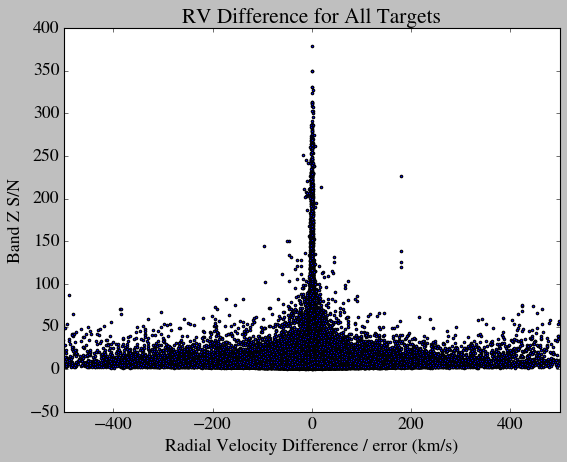

In [16]:
plt.scatter(np.concatenate(vdifftot2)/np.sqrt(1+np.concatenate(errtot2)),np.concatenate(sntot2),s=5)
plt.xlim(-500,500)
plt.xlabel('Radial Velocity Difference / error (km/s)')
plt.ylabel('Band Z S/N')
plt.title('RV Difference for All Targets')
plt.show()

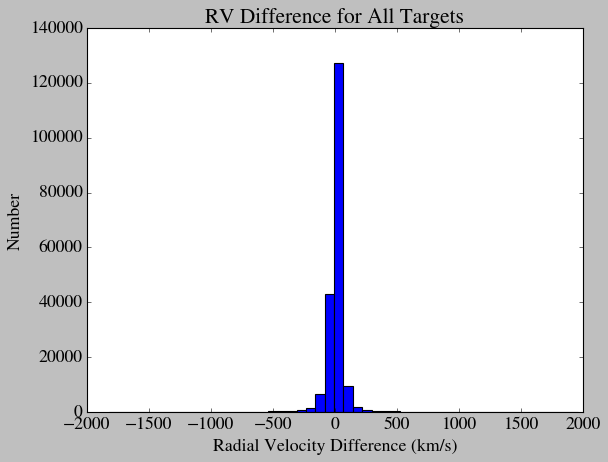

In [17]:
plt.hist(np.concatenate(vdifftot2)/np.sqrt(1+np.concatenate(errtot2)),bins=50)
plt.xlabel('Radial Velocity Difference (km/s)')
plt.ylabel('Number')
plt.title('RV Difference for All Targets')
plt.show()

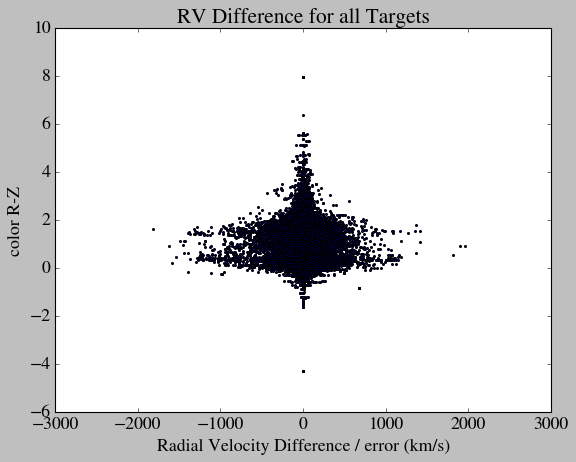

In [18]:
plt.scatter(np.concatenate(vdifftot2)/np.sqrt(1+np.concatenate(errtot2)),np.concatenate(colortot2),s=3)
#plt.xlim(-200,200)
plt.title('RV Difference for all Targets')
plt.xlabel('Radial Velocity Difference / error (km/s)')
plt.ylabel('color R-Z')
plt.show()

In [23]:
def rvs_scatter_night(rvsfile,n):
    vdifftot = []
    errtotf = []
    sntot = []
    colortot = []
    num = []
    uid,rv,rve,rsn = np.unique(rvsfile[1].data['TARGETID']),rvsfile[1].data['VRAD'],rvsfile[1].data['VRAD_ERR'],rvsfile[1].data['SN_Z']
   
    color = (22.5 - 2.5*np.log10(rvsfile[2].data['FIBERFLUX_G']))-(22.5- 2.5*np.log10(rvsfile[2].data['FIBERFLUX_R']))
    
    for ii in range(0,len(uid)):
        night = np.unique(rvsfile[2].data['NIGHT'][rvsfile[1].data['TARGETID'] == uid[ii]])
        #velff= rv[(rvsfile[1].data['TARGETID_F'] == uid[ii])] 
        
        print (night)
        for kk in range(0,len(night)):
            velff= rv[((rvsfile[1].data['TARGETID'] == uid[ii]) & (rvsfile[2].data['NIGHT'] == night[kk]))]
        
            velff_err= rve[(rvsfile[1].data['TARGETID'] == uid[ii]) & (rvsfile[2].data['NIGHT'] == night[kk])]
            snr = rsn[(rvsfile[1].data['TARGETID'] == uid[ii]) & (rvsfile[2].data['NIGHT'] == night[kk]) ]
            colorfi = color[(rvsfile[1].data['TARGETID'] == uid[ii]) & (rvsfile[2].data['NIGHT'] == night[kk])]
            snstd = np.std(snr)
            snmean = np.mean(snr)
            num.append(len(velff))
        #print (snstd,snmean)
            velfff = velff[(snr > snmean-n*snstd) & (snr < snmean+n*snstd)]
            colorf = colorfi[(snr > snmean-n*snstd) & (snr < snmean+n*snstd)]
            velff_errf = velff_err[(snr > snmean-n*snstd) & (snr < snmean+n*snstd)]
            snrf = snr[(snr > snmean-n*snstd) & (snr < snmean+n*snstd)]
        #print (velfff)
            diffv = []
            errtot = []
            sn = []
            colorff = []
            #print (velff,velff_err,snr)
            for jj in range(0,len(velfff)): 
            
            #print (k.rv,k2.rv)
                sni = np.repeat(snrf[jj],len(velfff))
                colorffi = np.repeat(colorf[jj],len(velfff))
                vi = np.repeat(velfff[jj],len(velfff))
                err = np.repeat(velff_errf[jj],len(velfff))
                diffv.append((vi - velfff))
                
                errtot.append(np.sqrt(err**2+velff_errf**2))
            #print (errtot)
                sn.append((sni/2+snrf/2))
                colorff.append(colorffi/2+colorf/2)
               
            print (len(diffv))            
            print (len(velfff))
            try:
                vdifftot.append(np.array(diffv)[np.triu_indices(len(velfff),1)])
                errtotf.append(np.array(errtot)[np.triu_indices(len(velfff),1)])
                sntot.append(np.array(sn)[np.triu_indices(len(velfff),1)])  
                colortot.append(np.array(colorff)[np.triu_indices(len(velfff),1)])
                print ('1')
            except (IndexError):
                continue
        #sp#ect.append(specdto)
        #indexout.append(indexfo[specdto < spaces])
            
        #print (len(vdiffto),len(specdto))
        
        #vdiffh.append(vdiffto[specdto < spaces])
       
        
        
    return vdifftot,errtotf,sntot,colortot,num
        
            
        
            
            
            
    